In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df= pd.read_csv(r"D:\Excel R\Excel R Project\Beds_Occupied.csv")

In [47]:
df.tail()

,Total Inpatient Beds
2021-06-11,312.0
2021-06-12,212.0
2021-06-13,299.0
2021-06-14,202.0
2021-06-15,220.0


In [4]:
df.shape

(359, 2)

# Data PreProcessing

In [5]:
df.mean()

Total Inpatient Beds    241.983287
dtype: float64

In [6]:
df.var()

Total Inpatient Beds    837.340502
dtype: float64

In [7]:
df.skew()

Total Inpatient Beds    0.480804
dtype: float64

In [8]:
df.kurtosis()

Total Inpatient Beds   -0.60372
dtype: float64

In [9]:
df.describe()

,Total Inpatient Beds
count,359.000000
mean,241.983287
std,28.936836
min,190.000000
25%,219.000000
50%,235.000000
75%,259.000000
max,341.000000


In [10]:
df.dtypes

collection_date         object
Total Inpatient Beds     int64
dtype: object

In [11]:
df.columns

Index(['collection_date', 'Total Inpatient Beds'], dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 359 entries, 0 to 358
Data columns (total 2 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   collection_date       359 non-null    object
 1   Total Inpatient Beds  359 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 5.7+ KB


In [13]:
df.isnull().sum()

collection_date         0
Total Inpatient Beds    0
dtype: int64

In [14]:
df.collection_date = pd.to_datetime(df.collection_date,format ="%d-%m-%Y")

In [15]:
df.set_index('collection_date',inplace =True)

In [16]:
df.index[0:5]

DatetimeIndex(['2020-06-15', '2020-06-16', '2020-06-17', '2020-06-18',
               '2020-06-19'],
              dtype='datetime64[ns]', name='collection_date', freq=None)

In [17]:
df.dtypes

Total Inpatient Beds    int64
dtype: object

In [18]:
## here we are indexing we acces the time series by using the index 
dt = pd.date_range("06-15-2020","06-15-2021")
idx = pd.DatetimeIndex(dt)
df= df.reindex(idx)

In [19]:
pd.set_option('display.max_rows', df.shape[0]+1) # Here we have NaN values we need to impute these values
print(df)

            Total Inpatient Beds
2020-06-15                 293.0
2020-06-16                 295.0
2020-06-17                 290.0
2020-06-18                 291.0
2020-06-19                 288.0
2020-06-20                 289.0
2020-06-21                 277.0
2020-06-22                 289.0
2020-06-23                 292.0
2020-06-24                 293.0
2020-06-25                 291.0
2020-06-26                 282.0
2020-06-27                 283.0
2020-06-28                 284.0
2020-06-29                 194.0
2020-06-30                 292.0
2020-07-01                 275.0
2020-07-02                 290.0
2020-07-03                 287.0
2020-07-04                 283.0
2020-07-05                 282.0
2020-07-06                 284.0
2020-07-07                 291.0
2020-07-08                 292.0
2020-07-09                 294.0
2020-07-10                 287.0
2020-07-11                 284.0
2020-07-12                 282.0
2020-07-13                 292.0
2020-07-14

In [20]:
#Missing Data ==> NaN Values 
print("NaN values in the  Total Inpatient Beds ",df.isna().sum())
print("The length of the data",len(df))
print("Total  Unique dates as index column",df.index.nunique())

NaN values in the  Total Inpatient Beds  Total Inpatient Beds    7
dtype: int64
The length of the data 366
Total  Unique dates as index column 366


In [21]:
# using the Forward-fill Missing values
df1 =df.interpolate(method ='time')
df1

,Total Inpatient Beds
2020-06-15,293.0
2020-06-16,295.0
2020-06-17,290.0
2020-06-18,291.0
2020-06-19,288.0
2020-06-20,289.0
2020-06-21,277.0
2020-06-22,289.0
2020-06-23,292.0
2020-06-24,293.0


In [22]:
#Missing Data ==> NaN Values 
print("NaN values in the  Total Inpatient Beds ",df.isna().sum())
print("The length of the data",len(df))
print("Total  Unique dates as index column",df.index.nunique())

NaN values in the  Total Inpatient Beds  Total Inpatient Beds    7
dtype: int64
The length of the data 366
Total  Unique dates as index column 366


# Dealing With Out-Liers

In [23]:
upper_limit =df1['Total Inpatient Beds'].mean() +1.9 * df1['Total Inpatient Beds'].std()
print(upper_limit)# above the value 299 is considered as outlier

lower_limit =df1['Total Inpatient Beds'].mean() -1.9 * df1['Total Inpatient Beds'].std()
print(lower_limit)# below the value 183 is considered as Outlier

296.3949580850033
186.5449326253792


In [24]:
#outliers 
out_liers =df1[(df1['Total Inpatient Beds'] > upper_limit) | (df1['Total Inpatient Beds'] < lower_limit)]
out_liers

,Total Inpatient Beds
2020-07-16,341.0
2020-08-29,299.0
2021-06-10,322.0
2021-06-11,312.0
2021-06-13,299.0


In [25]:
data =df1[(df1['Total Inpatient Beds'] < upper_limit) & (df1['Total Inpatient Beds'] > lower_limit)]
data

,Total Inpatient Beds
2020-06-15,293.0
2020-06-16,295.0
2020-06-17,290.0
2020-06-18,291.0
2020-06-19,288.0
2020-06-20,289.0
2020-06-21,277.0
2020-06-22,289.0
2020-06-23,292.0
2020-06-24,293.0


In [26]:
len(data)

361

In [27]:
361-30

331

In [28]:
#Missing Data ==> NaN Values 
print("NaN values in the  Total Inpatient Beds ",data.isna().sum())
print("The length of the data",len(df1))
print("Total  Unique dates as index column",data.index.nunique())

NaN values in the  Total Inpatient Beds  Total Inpatient Beds    0
dtype: int64
The length of the data 366
Total  Unique dates as index column 361


# Data Visualization

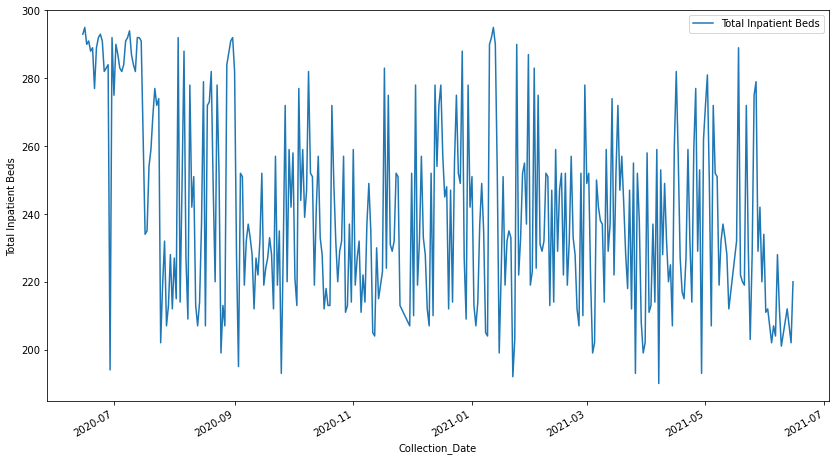

In [29]:
#line PLot of Time Series
rk = data.plot.line(figsize=(14,8))
rk.set_xlabel('Collection_Date')
rk.set_ylabel('Total Inpatient Beds');
# From the plot we can see that the data is stationary.
#the X- axis contains the Time Series variable (collection date)
# the Y-axis contains the Random variable (Total In patient Beds) value ranges from 150-350
# the 

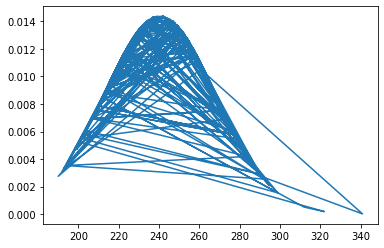

In [30]:
#Normal Distribution
from scipy.stats import norm
import statistics
mean =statistics.mean(data['Total Inpatient Beds'])
std =statistics.stdev(data['Total Inpatient Beds'])

#plt.figsize =(14,10)
plt.plot(df1['Total Inpatient Beds'], norm.pdf(df1['Total Inpatient Beds'], mean, std))
plt.show()
# from this normal distributin we can clearly say that they are two Outliers in the Data  320, and 340
# this is  one of the reason that we are getting for higher variane value =  837.340502 because of the data is spread from 190 to 340
# 320 & 340 (because these two data points in the data is been widely spreaded)

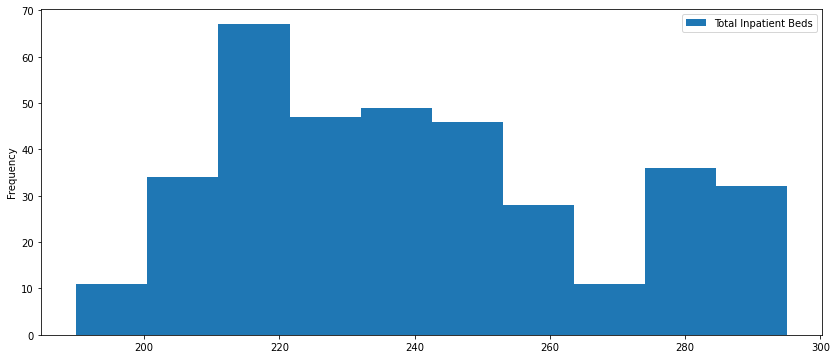

In [31]:
#Histogram Plot
rk1 =data.plot(kind="hist",figsize =(14,6),fontsize =10)
plt.show()

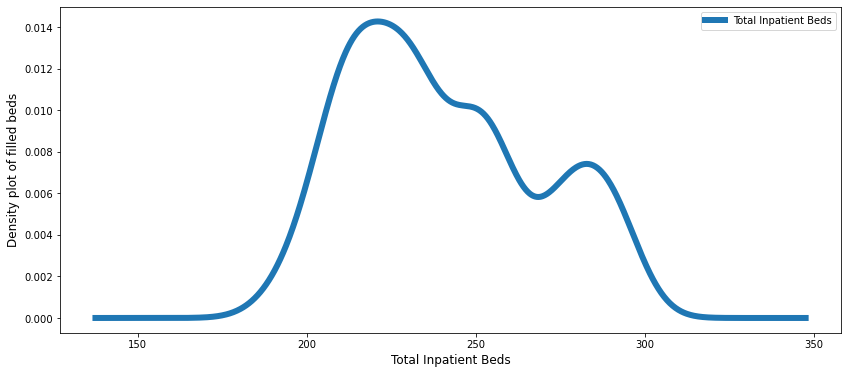

In [32]:
rk2 =data.plot(kind="density",figsize =(14,6),fontsize =10,linewidth=6)
rk2.set_xlabel("Total Inpatient Beds",fontsize =12)
rk2.set_ylabel("Density plot of filled beds",fontsize =12)
plt.show()

C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Total Inpatient Beds'>

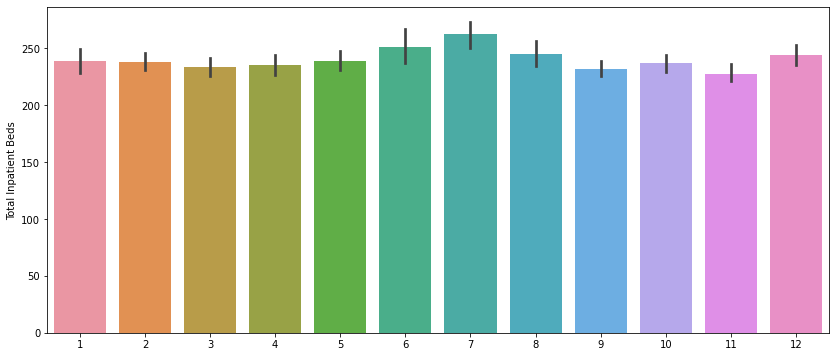

In [33]:
fig, rk4 = plt.subplots(figsize=(14,6))
sns.barplot(data.index.month,
            data['Total Inpatient Beds'], 
            ax =rk4,
            linewidth =4)


C:\Users\RaviKiran\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='Total Inpatient Beds'>

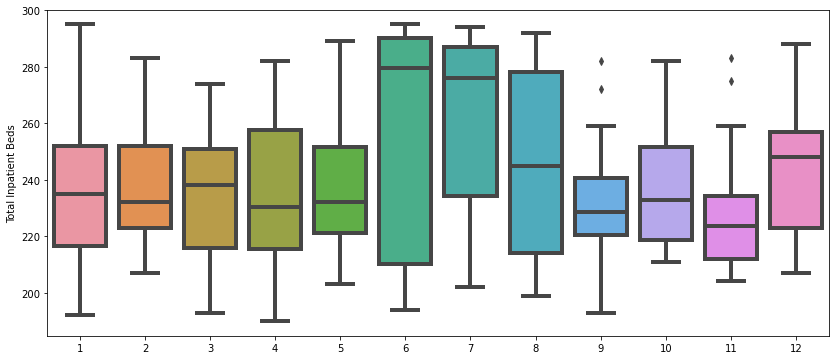

In [34]:
fig, rk3 = plt.subplots(figsize=(14,6))
sns.boxplot(data.index.month,
            data['Total Inpatient Beds'], 
            ax =rk3,
            linewidth =4)

In [35]:
X=data['Total Inpatient Beds'].values
split   =  round(len(X)/2)
X1, X2 =X[0:split],X[split:]
mean1 =X1.mean()
mean2 =X2.mean()
var1 =X1.var()
var2 =X2.var()
print("The Mean  and Variance of 1st half is ",mean1,var1)
print("The Mean  and Variance of 2nd half is ",mean2,var2)
## Here the Mean and variance are  Almost Constant

The Mean  and Variance of 1st half is  244.42222222222222 884.1617283950618
The Mean  and Variance of 2nd half is  236.51381215469613 618.0619639205153


# Checking For Stationary

In [36]:
# Hypothisis Testing checking for the Stationary or NOt
from statsmodels.tsa.stattools import adfuller
x=data['Total Inpatient Beds'].values
result= adfuller(x)
#print(result)
print('ADF Statistic: %.3f' % result[0])
print("The P-Value:",result[1])
#print('p-value: %.f' % result[1])
print("Lags- Used: %.f" % result[2])
print("The number of Observarions Used is %3.f"% result[3])
print('Critical Values:')
#print("The P-Value:",result[1])
for key,value in result[4].items():
    print('\t%s: %.3f' % (key, value))
#The Intuation of Dicky Fuller Test 
#Here the Critical value is Less than 5% , thus the Time Series is Stationary with the 95% confidence

ADF Statistic: -5.300
The P-Value: 5.475585014334677e-06
Lags- Used: 4
The number of Observarions Used is 356
Critical Values:
	1%: -3.449
	5%: -2.870
	10%: -2.571


# Model Building --Data Driven Approch

Naive Forecast  Method
Smoothing Average Method
Simple Exponential methods
Advance Exponential methods

In [38]:
Train =data.head(331)
Test =data.tail(30)

# Naive Method

In [39]:
Train_len = 324
y_hat_naive= Test.copy()
y_hat_naive['naive_forecast'] = Train['Total Inpatient Beds'][Train_len-1]

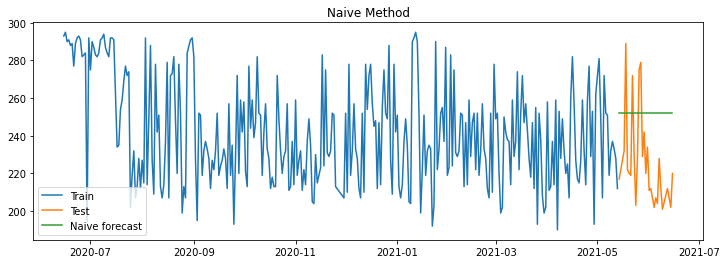

In [40]:
#Plot train, test and forecast
plt.figure(figsize=(12,4))
plt.plot(Train['Total Inpatient Beds'], label='Train')
plt.plot(Test['Total Inpatient Beds'], label='Test')
plt.plot(y_hat_naive['naive_forecast'], label='Naive forecast')
plt.legend(loc='best')
plt.title('Naive Method')
plt.show()

In [41]:
#calculating the RMSE and MaPE
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse =round(sqrt(mean_squared_error(Test['Total Inpatient Beds'], y_hat_naive['naive_forecast'])),2)
print("RMSE value for Naive Method is ",rmse)
mape = np.round(np.mean(np.abs(Test['Total Inpatient Beds']- y_hat_naive['naive_forecast'])/Test['Total Inpatient Beds'])*100,2)
print("The Mape value for Naive Method is ",mape)


RMSE value for Naive Method is  34.96
The Mape value for Naive Method is  15.14


# Simple Average method

In [43]:
y_hat_simple_avg =Test.copy()
y_hat_simple_avg['simpel_forecast_method']= Train['Total Inpatient Beds'].mean()

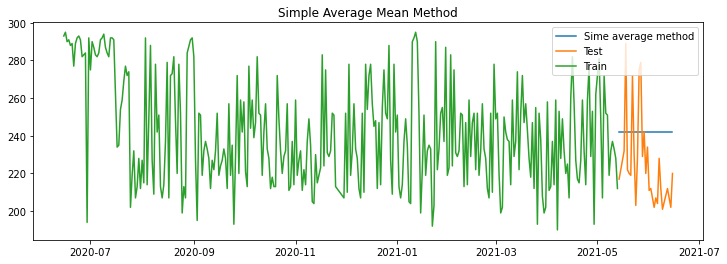

In [44]:
plt.figure(figsize =(12,4))
plt.plot(y_hat_simple_avg['simpel_forecast_method'],label ="Sime average method")
plt.plot(Test['Total Inpatient Beds'],label ="Test")
plt.plot(Train['Total Inpatient Beds'],label ="Train")
plt.title("Simple Average Mean Method")
plt.legend(loc ="best")
plt.show()

In [45]:
simple_avg_rmse = np.sqrt(mean_squared_error(Test['Total Inpatient Beds'], y_hat_simple_avg['simpel_forecast_method'])).round(2)
simple_avg_mape = np.round(np.mean(np.abs(Test['Total Inpatient Beds']-y_hat_simple_avg['simpel_forecast_method'])/Test['Total Inpatient Beds'])*100,2)
print("the Simple_avg_rmse method value is",simple_avg_rmse)
print("The Simple_avg_mape method value is ",simple_avg_mape)

the Simple_avg_rmse method value is 28.17
The Simple_avg_mape method value is  11.56


# Simple moving average method

In [46]:
y_hat_smam = data.copy()
#window_size =3
y_hat_smam['smam_forecast'] = data['Total Inpatient Beds'].rolling(window=3).mean()
y_hat_smam['smam_forecast'][Train_len:] = y_hat_smam['smam_forecast'][Train_len-1]
y_hat_smam.head(5)# we can see below the two observations need to be discarded because of window size is 3

,Total Inpatient Beds,smam_forecast
2020-06-15,293.0,NaN
2020-06-16,295.0,NaN
2020-06-17,290.0,292.666667
2020-06-18,291.0,292.000000
2020-06-19,288.0,289.666667


The rolling() function on the Series Pandas object will automatically group observations into a window. You can specify the window size, and by default a trailing window is created. Once the window is created, we can take the mean value, and this is our transformed dataset

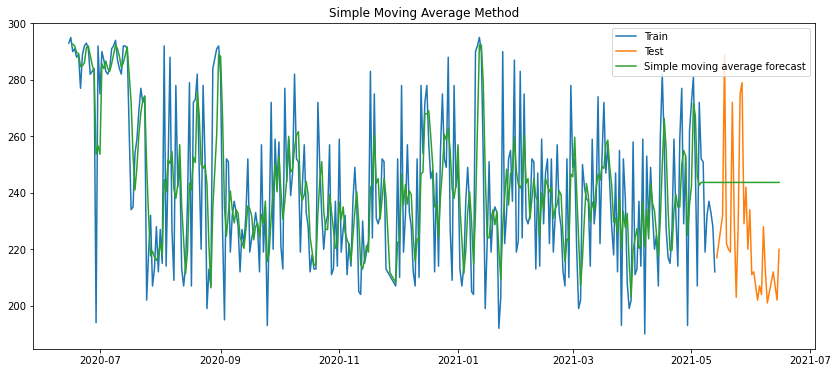

In [44]:
plt.figure(figsize=(14,6))
plt.plot(Train['Total Inpatient Beds'], label='Train')
plt.plot(Test['Total Inpatient Beds'], label='Test')
plt.plot(y_hat_smam['smam_forecast'], label='Simple moving average forecast')
plt.legend(loc='best')
plt.title('Simple Moving Average Method')
plt.show()
#we can clearly see that simple moving average method is clearly plotted with the green color

In [45]:
y_hat_smam['smam_forecast'] = y_hat_smam['smam_forecast'].bfill() # treating the Nan Valeus above
len(y_hat_smam['smam_forecast']),len(y_hat_smam['Total Inpatient Beds'])

(361, 361)

In [46]:
Train_len = 324+7
smam_rmse = np.sqrt(mean_squared_error(Test['Total Inpatient Beds'], y_hat_smam['smam_forecast'][Train_len:])).round(2)
smam_mape = np.round(np.mean(np.abs(Test['Total Inpatient Beds'] - y_hat_smam['smam_forecast'][Train_len:])/Test['Total Inpatient Beds'])*100,2)

print("The vlalue of smam_rmse method value is",smam_rmse)
print("The vlalue of smam_mape method value is",smam_mape)
                     

The vlalue of smam_rmse method value is 29.28
The vlalue of smam_mape method value is 12.22


#Simple  Exponential smoothing 

No use nan values 
Simple  Exponential smoothing   it better for Univariate analysis but without trend and seasonality will perform better results 
in our problem there is no trend but there is seasonality

In [47]:
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
model = SimpleExpSmoothing(Train['Total Inpatient Beds'])
model_fit = model.fit(smoothing_level=0.2,optimized=False)
model_fit.params
y_hat_ses = Test.copy()
y_hat_ses['ses_forecast'] = model_fit.forecast(30)


C:\Users\RaviKiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
C:\Users\RaviKiran\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(
C:\Users\RaviKiran\anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:376: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  warnings.warn('No supported index is available.'


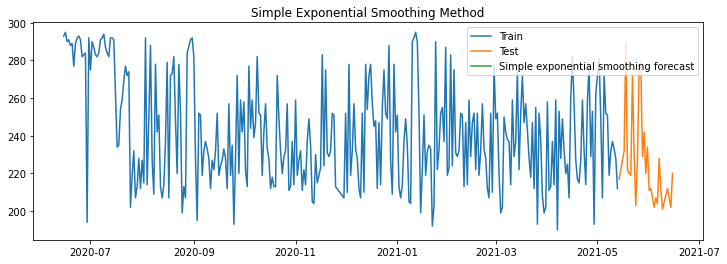

In [48]:
plt.figure(figsize=(12,4))
plt.plot(Train['Total Inpatient Beds'], label='Train')
plt.plot(Test['Total Inpatient Beds'], label='Test')
plt.plot(y_hat_ses['ses_forecast'], label='Simple exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Simple Exponential Smoothing Method')
plt.show()

# Holt's method with trend

In [49]:
#Holt's method with trend
from statsmodels.tsa.holtwinters import ExponentialSmoothing
holt_model = ExponentialSmoothing(np.asarray(Train['Total Inpatient Beds']) ,seasonal_periods=12 ,trend='additive', seasonal=None)
holt_model_fit = holt_model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=bool)
print(holt_model_fit.params)
y_hat_holt = Test.copy()
y_hat_holt['holt_forecast'] = holt_model_fit.forecast(len(Test))


{'smoothing_level': 0.2, 'smoothing_trend': 0.01, 'smoothing_seasonal': nan, 'damping_trend': nan, 'initial_level': 291.4015878677037, 'initial_trend': -0.4244707703844537, 'initial_seasons': array([], dtype=float64), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


<ipython-input-49-2d1c3dfde364>:4: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead
  holt_model_fit = holt_model.fit(smoothing_level=0.2, smoothing_slope=0.01, optimized=bool)


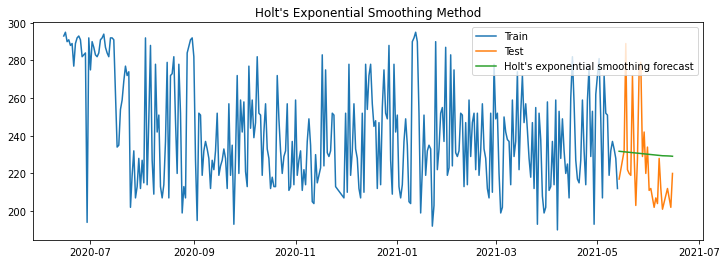

In [50]:
plt.figure(figsize=(12,4))
plt.plot( Train['Total Inpatient Beds'], label='Train')
plt.plot(Test['Total Inpatient Beds'], label='Test')
plt.plot(y_hat_holt['holt_forecast'], label='Holt\'s exponential smoothing forecast')
plt.legend(loc='best')
plt.title('Holt\'s Exponential Smoothing Method')
plt.show()

In [51]:
holt_rmse = np.sqrt(mean_squared_error(Test['Total Inpatient Beds'], y_hat_holt['holt_forecast'])).round(2)
holt_mape = np.round(np.mean(np.abs(Test['Total Inpatient Beds']-y_hat_holt['holt_forecast'])/Test['Total Inpatient Beds'])*100,2)

print("The vlalue of holt_rmse method value is",holt_rmse)
print("The vlalue of holt_mape method value is",holt_mape)
                     

The vlalue of holt_rmse method value is 23.42
The vlalue of holt_mape method value is 7.96


# Holt Winter's multiplicative method with trend and seasonality

In [52]:
#Holt Winter's multiplicative method with trend and seasonality
y_hat_hwm = Test.copy()
holt_winmodel = ExponentialSmoothing(np.asarray(Train['Total Inpatient Beds']) ,seasonal_periods=12 ,trend='add', seasonal='mul')
holt_winmodel_fit = holt_winmodel.fit(optimized=True)
print(holt_winmodel.params)
y_hat_hwm['hw_forecast'] = holt_winmodel_fit.forecast(30)

C:\Users\RaviKiran\anaconda3\lib\site-packages\statsmodels\tsa\holtwinters\model.py:427: FutureWarning: After 0.13 initialization must be handled at model creation
  warnings.warn(


{'smoothing_level': 0.07962254295157042, 'smoothing_trend': 0.006212830942162675, 'smoothing_seasonal': 0.02407277048047952, 'damping_trend': nan, 'initial_level': 256.85115697038816, 'initial_trend': -0.24297296877375896, 'initial_seasons': array([1.12261312, 1.14316715, 1.0928904 , 1.13956629, 1.12458969,
       1.14110005, 1.1239446 , 1.0906499 , 1.09828671, 1.10190715,
       1.10110111, 1.12309751]), 'use_boxcox': False, 'lamda': None, 'remove_bias': False}


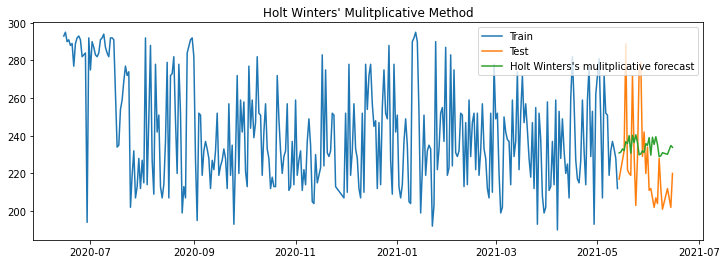

In [53]:
plt.figure(figsize=(12,4))
plt.plot( Train['Total Inpatient Beds'], label='Train')
plt.plot(Test['Total Inpatient Beds'], label='Test')
plt.plot(y_hat_hwm['hw_forecast'], label='Holt Winters\'s mulitplicative forecast')
plt.legend(loc='best')
plt.title('Holt Winters\' Mulitplicative Method')
plt.show()

In [54]:
holt_winter_rmse = np.sqrt(mean_squared_error(Test['Total Inpatient Beds'], y_hat_hwm['hw_forecast'])).round(2)
holt_winter_mape = np.round(np.mean(np.abs(Test['Total Inpatient Beds'] - y_hat_hwm['hw_forecast'])/Test['Total Inpatient Beds'])*100,2)

print("The vlalue of holt_winter_rmse method value is",holt_winter_rmse)
print("The vlalue of holt_winter_mape method value is",holt_winter_mape)

The vlalue of holt_winter_rmse method value is 25.28
The vlalue of holt_winter_mape method value is 9.18


In [55]:
results = pd.DataFrame({'Method':['Naive method',"Simple Average Mean Method","Simple Moving Average Method","Holt\'s Exponential Smoothing Method","Holt Winters\'s mulitplicative forecast"],
                        'MAPE': [mape,simple_avg_mape,smam_mape,holt_mape,holt_winter_mape], 
                        'RMSE': [rmse,simple_avg_rmse,smam_rmse,holt_rmse,holt_winter_rmse]})
results = results[['Method', 'RMSE', 'MAPE']]
results

,Method,RMSE,MAPE
0,Naive method,34.96,15.14
1,Simple Average Mean Method,28.17,11.56
2,Simple Moving Average Method,29.28,12.22
3,Holt's Exponential Smoothing Method,23.42,7.96
4,Holt Winters's mulitplicative forecast,25.28,9.18


# Model Based Approches

Ar
ArMA
ARIMA
Auto Arima

In [56]:
Train =data.head(331)
Test =data.tail(30)

In [57]:
Train

,Total Inpatient Beds
2020-06-15,293.0
2020-06-16,295.0
2020-06-17,290.0
2020-06-18,291.0
2020-06-19,288.0
2020-06-20,289.0
2020-06-21,277.0
2020-06-22,289.0
2020-06-23,292.0
2020-06-24,293.0


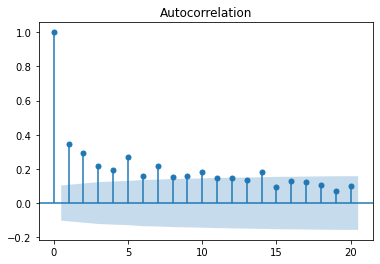

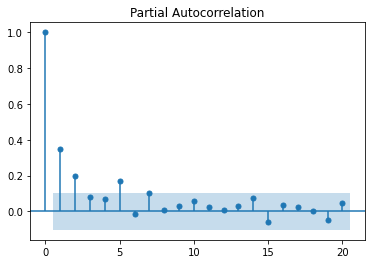

In [58]:
##ACF plots 
from statsmodels.graphics.tsaplots import plot_acf 
plot_acf(data['Total Inpatient Beds'],lags=20)
plt.show()

#PACF Plots
from statsmodels.graphics.tsaplots import plot_pacf
#df= pd.read_csv(r"C:\Users\RaviKiran\OneDrive\Desktop\Data Science\Data Sets\daily-minimum-temperatures.csv", header=0, index_col=0)
plot_pacf(data['Total Inpatient Beds'],lags= 20)# -1 to +1
plt.show()

Auto Regression (AR) model

In [59]:
import pmdarima as pm
from pmdarima import auto_arima
import warnings
warnings.filterwarnings('ignore')

In [60]:
auto_ariima =auto_arima(Train['Total Inpatient Beds'],trace =True,suppress_warnings=True)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=3072.236, Time=0.26 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=3227.725, Time=0.02 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=3145.128, Time=0.11 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=3069.847, Time=0.15 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=3225.745, Time=0.01 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=3068.378, Time=0.18 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=3068.616, Time=0.23 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=3072.023, Time=0.26 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=3068.925, Time=0.16 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=3126.002, Time=0.11 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=3067.550, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=3068.778, Time=0.04 sec
 ARIMA(1,1,0)(0,0,0)[0]             : AIC=3143.177, Time=0.04 sec
 ARIMA(2,1,1)(0,0,0)[0]             : AIC=3067.916, Time=0.19 sec
 ARIMA(1,1,2)(0,0,0)[0]          

In [61]:
auto_ariima.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  331
Model:               SARIMAX(1, 1, 1)   Log Likelihood               -1530.775
Date:                Fri, 27 Aug 2021   AIC                           3067.550
Time:                        18:14:38   BIC                           3078.948
Sample:                             0   HQIC                          3072.097
                                - 331                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1135      0.057      2.000      0.046       0.002       0.225
ma.L1         -0.9090      0.022    -40.520      0.000      -0.953      -0.865
sigma2       623.2081     48.765     12.780      0.000     527.631     718.786
===================================================================================
Ljung-Box (L1) (Q):                   0.06   Jarque-Bera (JB):                 1.78
Prob(Q):                              0.81   Prob(JB):                         0.41
Heteroskedasticity (H):               0.83   Skew:                             0.17
Prob(H) (two-sided):                  0.32   Kurtosis:                         3.08
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

For Best Model as suggested by auto arima

In [62]:
from statsmodels.tsa.arima_model import ARIMA
model=ARIMA(Train['Total Inpatient Beds'],order=(1,1,1))
model=model.fit()

In [63]:
start1 =len(Train)
end1 =len(Train)+len(Test) -1
y_pred = model.predict(start =start1,end =end1,typ ='levels')
y_pred.head(5)

330    232.445595
331    234.709318
332    234.841596
333    234.724007
334    234.577126
dtype: float64

In [64]:
y_pred.index =data.index[start1:end1+1]
y_pred.head(5)

2021-05-14    232.445595
2021-05-15    234.709318
2021-05-16    234.841596
2021-05-17    234.724007
2021-05-18    234.577126
dtype: float64

In [65]:
# again seting the index to its date columns
y_pred.index =data.index[start1:end1+1]
y_pred.head(5)

2021-05-14    232.445595
2021-05-15    234.709318
2021-05-16    234.841596
2021-05-17    234.724007
2021-05-18    234.577126
dtype: float64

<AxesSubplot:>

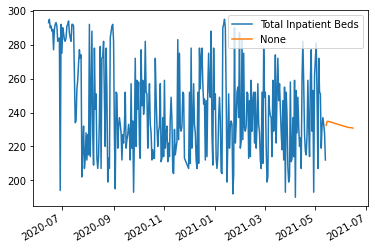

In [66]:
Train['Total Inpatient Beds'].plot(legend =True)
y_pred.plot(legend =True)
#Test['Total Inpatient Beds'].plot(legend =True)

In [67]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_pred,Test['Total Inpatient Beds'])
#print(mse)
rmse =sqrt(mse)
print(rmse)
#23.157 This model doesnot deal with the outliers

23.778271703313848


In [68]:
from statsmodels.tsa.arima_model import ARIMA
ar_model=ARIMA(Train['Total Inpatient Beds'],order=(1,0,0))
ar_model=ar_model.fit()

In [69]:
start1 =len(Train)
end1 =len(Train)+len(Test) -1
y_pred_ar = ar_model.predict(start =start1,end =end1,typ ='levels')
y_pred_ar.head(5)

331    231.958228
332    238.552009
333    240.730456
334    241.450169
335    241.687947
dtype: float64

In [70]:
# again seting the index to its date columns
y_pred_ar.index =data.index[start1:end1+1]
y_pred_ar.head(5)

2021-05-14    231.958228
2021-05-15    238.552009
2021-05-16    240.730456
2021-05-17    241.450169
2021-05-18    241.687947
dtype: float64

<AxesSubplot:>

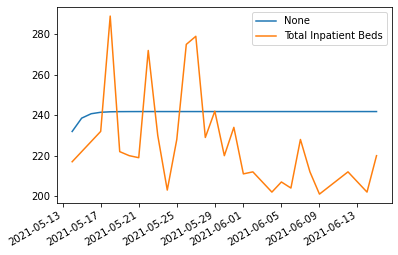

In [71]:
y_pred_ar.plot(legend =True)
Test['Total Inpatient Beds'].plot(legend =True)

In [72]:
from sklearn.metrics import mean_squared_error
from math import sqrt
mse = mean_squared_error(y_pred_ar,Test['Total Inpatient Beds'])
#print(mse)
rmse =sqrt(mse)
print(rmse)
#23.157 This model doesnot deal with the outliers

27.86810315735036


MA Model

In [73]:
from statsmodels.tsa.arima_model import ARMA
from random import random

# fit model
ma_model = ARMA(Train['Total Inpatient Beds'], order=(0, 1))
ma_model_fit = ma_model.fit(disp=False)

In [74]:
start1 =len(Train)
end1 =len(Train)+len(Test) -1
#predicted values of ARMA model
ma_preds =ma_model_fit.predict(start=start1, end=end1)
ma_preds.head(5)

331    235.357281
332    241.783309
333    241.783309
334    241.783309
335    241.783309
dtype: float64

In [75]:
ma_preds.index =data.index[start1:end1+1]
ma_preds.head(5)

2021-05-14    235.357281
2021-05-15    241.783309
2021-05-16    241.783309
2021-05-17    241.783309
2021-05-18    241.783309
dtype: float64

In [76]:
#rmse and Mape
mse = mean_squared_error(Test['Total Inpatient Beds'],ma_preds)
rmse =sqrt(mse)
rmse

28.011483359578442

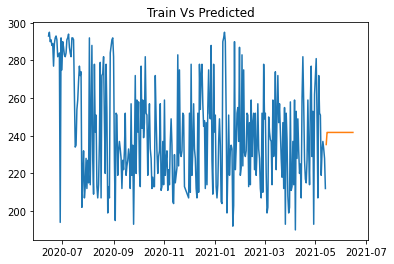

In [77]:
plt.plot(Train['Total Inpatient Beds'],label ="Train")
plt.plot(ma_preds,label="Predicted")
plt.title("Train Vs Predicted")
plt.show()

ARMA model

In [78]:
from statsmodels.tsa.arima_model import ARMA## p = 5 or 4 as per acf 
from random import random

# fit model
arma_model = ARMA(Train['Total Inpatient Beds'], order=(4, 1))
arma_model = arma_model.fit(disp=False)

In [79]:
start1 =len(Train)
end1 =len(Train)+len(Test) -1
#predicted values of ARMA model
arma_preds =arma_model.predict(start=start1, end=end1)
arma_preds.head(5)

331    231.157513
332    232.419348
333    235.033274
334    237.515120
335    238.727991
dtype: float64

In [80]:
arma_preds.index =data.index[start1:end1+1]
arma_preds.head(5)

2021-05-14    231.157513
2021-05-15    232.419348
2021-05-16    235.033274
2021-05-17    237.515120
2021-05-18    238.727991
dtype: float64

In [81]:
mse = mean_squared_error(Test['Total Inpatient Beds'], arma_preds)  # p = 6 ==>26 p=4=>27
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 27.765318888325005, MSE:770.9129329703773


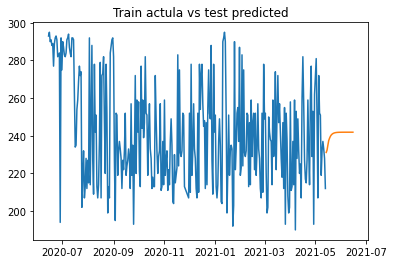

In [82]:
plt.plot(Train['Total Inpatient Beds'],label ="Train")
plt.plot(arma_preds,label ="Test Predicited")
plt.title("Train actula vs test predicted")
plt.show()

In [83]:
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from math import sqrt

# fit model
custom_model = ARIMA(Train['Total Inpatient Beds'], order=(5, 0, 3))
custom_model = custom_model.fit(disp=1)


In [84]:
custom_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               ARMA Model Results                               
================================================================================
Dep. Variable:     Total Inpatient Beds   No. Observations:                  331
Model:                       ARMA(5, 3)   Log Likelihood               -1535.769
Method:                         css-mle   S.D. of innovations             24.860
Date:                  Fri, 27 Aug 2021   AIC                           3091.539
Time:                          18:14:49   BIC                           3129.560
Sample:                               0   HQIC                          3106.703
                                                                                
==============================================================================================
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const                        241.8811      2.464     98.171      0.000     237.052     246.710
ar.L1.Total Inpatient Beds    -0.5881      0.054    -10.853      0.000      -0.694      -0.482
ar.L2.Total Inpatient Beds     1.3281      0.058     22.762      0.000       1.214       1.442
ar.L3.Total Inpatient Beds     0.9164      0.079     11.611      0.000       0.762       1.071
ar.L4.Total Inpatient Beds    -0.4535      0.058     -7.787      0.000      -0.568      -0.339
ar.L5.Total Inpatient Beds    -0.2051      0.055     -3.718      0.000      -0.313      -0.097
ma.L1.Total Inpatient Beds     0.8966      0.015     58.759      0.000       0.867       0.926
ma.L2.Total Inpatient Beds    -0.8966      0.007   -119.959      0.000      -0.911      -0.882
ma.L3.Total Inpatient Beds    -1.0000      0.016    -63.927      0.000      -1.031      -0.969
                                    Roots                                    
=============================================================================
                  Real          Imaginary           Modulus         Frequency
-----------------------------------------------------------------------------
AR.1           -0.9513           -0.3420j            1.0109           -0.4451
AR.2           -0.9513           +0.3420j            1.0109            0.4451
AR.3            1.0011           -0.0000j            1.0011           -0.0000
AR.4            1.6245           -0.0000j            1.6245           -0.0000
AR.5           -2.9347           -0.0000j            2.9347           -0.5000
MA.1            1.0000           -0.0000j            1.0000           -0.0000
MA.2           -0.9483           -0.3174j            1.0000           -0.4486
MA.3           -0.9483           +0.3174j            1.0000            0.4486
-----------------------------------------------------------------------------
"""

In [85]:
custom_preds =custom_model.predict(start =start1,end=end1)
custom_preds.head()

331    238.848609
332    228.526368
333    241.680128
334    237.881232
335    239.230885
dtype: float64

In [86]:
custom_preds.index =data.index[start1:end1+1]
custom_preds.head(5)

2021-05-14    238.848609
2021-05-15    228.526368
2021-05-16    241.680128
2021-05-17    237.881232
2021-05-18    239.230885
dtype: float64

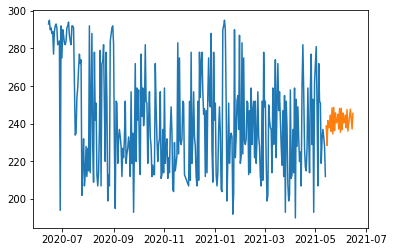

In [87]:
plt.plot(Train['Total Inpatient Beds'],label ="Train")
plt.plot(custom_preds,label ="Test")

In [88]:
mse = mean_squared_error(Test['Total Inpatient Beds'], custom_preds)  # p = 6 ==>26 p=4=>27
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 29.063423783917724, MSE:844.6826020435944


In [89]:
#orederv =5,0,3 ==> 29.063
#oerder =5,0,2 ==> 2696057

# (SARIMA)

#Seasonal Auto Regressive Integrated moving Average or Seasonal ARIMA it supports univariate time series data with a seasonal component
#it has 3 new hyperparameters likke p,d,q, and with additional parameter seasonality.
#There are four seasonal elements that are not part of ARIMA that must be configured.

P: Seasonal autoregressive order.
D: Seasonal difference order.
Q: Seasonal moving average order.
m: The number of time steps for a single seasonal period. For example, an S of 12 for monthly data suggests a yearly seasonal cycle.
SARIMA notation: SARIMA(p,d,q)(P,D,Q,m)

In [90]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
sarimax_model =SARIMAX(Train['Total Inpatient Beds'],order =(5,0,3),seasonal_order=(1, 1, 1, 12))#m =12 because for every 12 months the seasonal preiod changes
sarimax_model =sarimax_model.fit()

In [91]:
sarimax_preds =sarimax_model.predict(start =start1,end =end1)
sarimax_preds.head()

331    231.203547
332    226.930662
333    235.292558
334    232.408449
335    235.702215
Name: predicted_mean, dtype: float64

In [92]:
sarimax_preds.index =data.index[start1:end1+1]
sarimax_preds.head()

2021-05-14    231.203547
2021-05-15    226.930662
2021-05-16    235.292558
2021-05-17    232.408449
2021-05-18    235.702215
Name: predicted_mean, dtype: float64

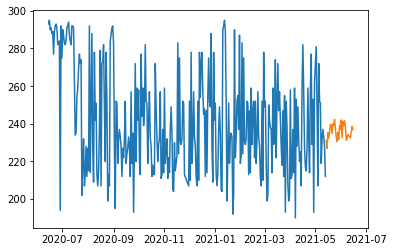

In [93]:
plt.plot(Train['Total Inpatient Beds'],label ="True")
plt.plot(sarimax_preds,label =True)

In [94]:
mse = mean_squared_error(Test['Total Inpatient Beds'], sarimax_preds)  # m=12==>26.688,m=6==>27.2818
rmse = sqrt(mse)
print('RMSE: {}, MSE:{}'.format(rmse,mse))

RMSE: 26.688384674364087, MSE:712.2698765268318


# Auto Sarima 

In [95]:
pip install pyramid-arima

  Using cached pyramid-arima-0.8.1.tar.gz (515 kB)
  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima
    Running setup.py install for pyramid-arima: started
    Running setup.py install for pyramid-arima: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\RaviKiran\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\RaviKiran\\AppData\\Local\\Temp\\pip-install-fqvfr0ma\\pyramid-arima_e8cc5de8fa3d4380b4cf9fef7c95ec10\\setup.py'"'"'; __file__='"'"'C:\\Users\\RaviKiran\\AppData\\Local\\Temp\\pip-install-fqvfr0ma\\pyramid-arima_e8cc5de8fa3d4380b4cf9fef7c95ec10\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\RaviKiran\AppData\Local\Temp\pip-wheel-46uwyioj'
       cwd: C:\Users\RaviKiran\AppData\Local\Temp\pip-install-fqvfr0ma\pyramid-arima_e8cc5de8fa3d4380b4cf9fef7c95ec10\
  Complete output (174 lines):
  Partial import of pyramid during the build process.
  
  Requirements: ['

In [96]:
pip install pyramid-arima

Note: you may need to restart the kernel to use updated packages.Collecting pyramid-arima
  Using cached pyramid-arima-0.8.1.tar.gz (515 kB)


  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\RaviKiran\anaconda3\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\RaviKiran\\AppData\\Local\\Temp\\pip-install-jtavle9f\\pyramid-arima_fc82b74f81294c28acad5ae8e577bfe8\\setup.py'"'"'; __file__='"'"'C:\\Users\\RaviKiran\\AppData\\Local\\Temp\\pip-install-jtavle9f\\pyramid-arima_fc82b74f81294c28acad5ae8e577bfe8\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\RaviKiran\AppData\Local\Temp\pip-wheel-xcb3m3fu'
       cwd: C:\Users\RaviKiran\AppData\Local\Temp\pip-install-jtavle9f\pyramid-arima_fc82b74f81294c28acad5ae8e577bfe8\
  Complete output (174 lines):
  Partial import of pyramid during the build process.
  
  Requirements: ['


  Running setup.py clean for pyramid-arima
Failed to build pyramid-arima
    Running setup.py install for pyramid-arima: started
    Running setup.py install for pyramid-arima: finished with status 'error'
